In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


**Cleaning Data**

In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   EdLevel       87973 non-null  object 
 2   YearsCodePro  66136 non-null  object 
 3   Employment    87898 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [5]:
df = df.drop("Employment",axis=1)

In [6]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0


In [7]:
df['Country'].value_counts()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [8]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [9]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                18647
Other                                                    9581
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094


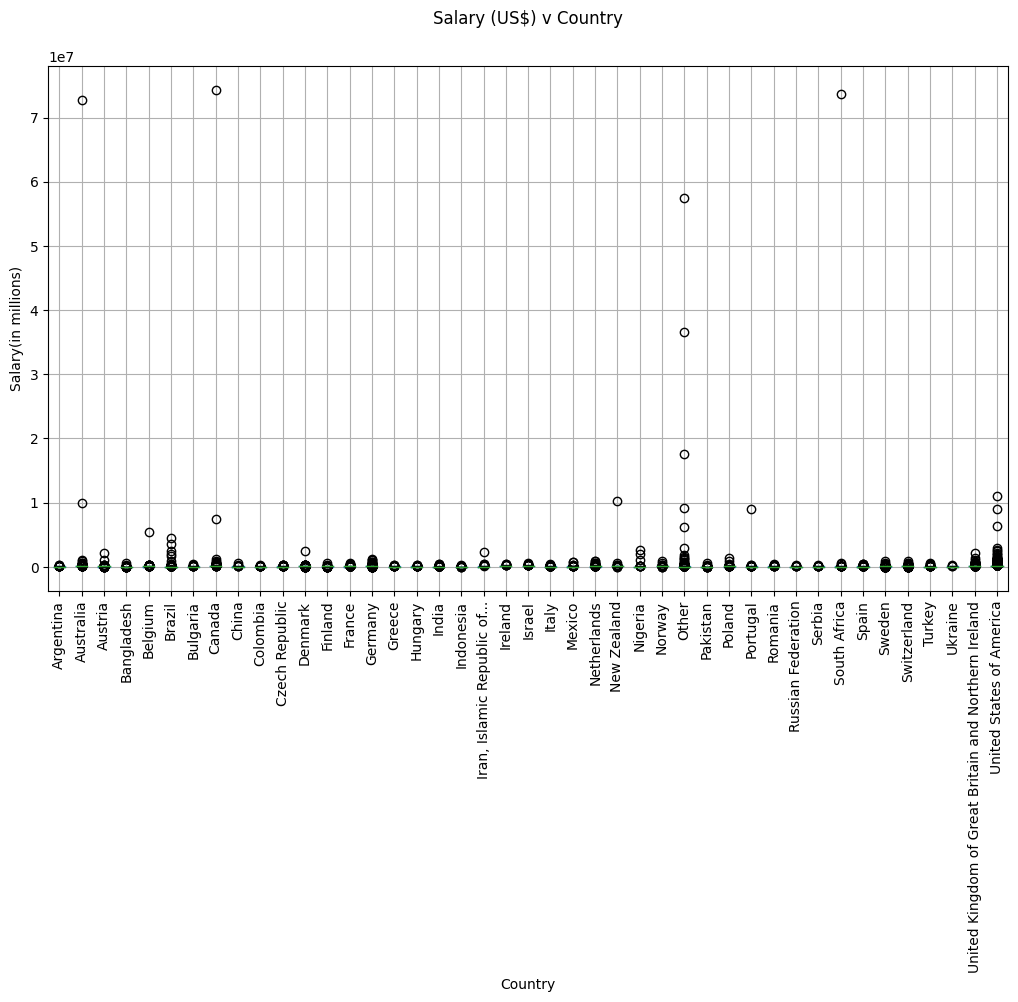

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary(in millions)')
plt.xticks(rotation=90)
plt.show()

In [11]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

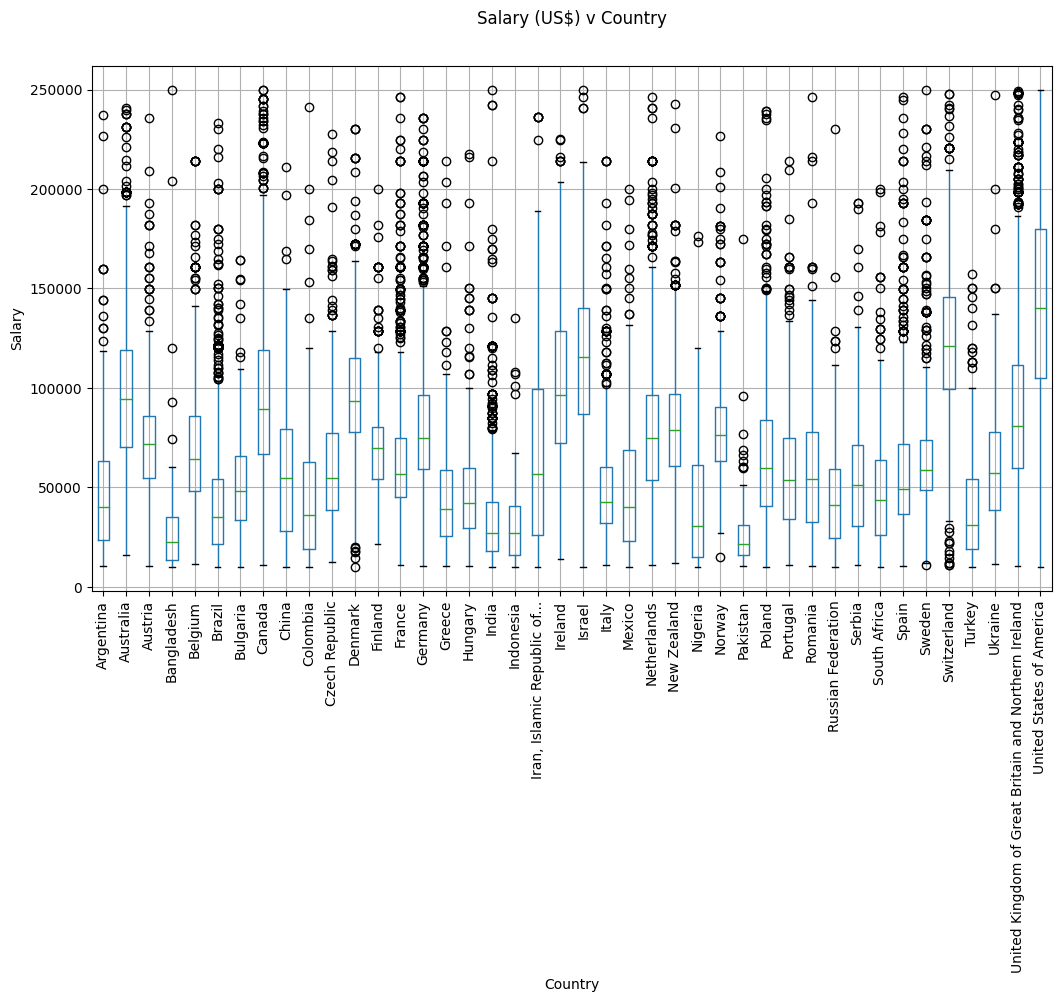

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '4', '16', '28', '30', '8', '24', '40',
       '25', '12', '20', '11', '18', '50', '27', '17', '43', '26', '38',
       '33', '29', '22', '1', '31', '34', '32', '37', '42',
       'More than 50 years', '36', '39', nan, '35', '41', '44', '48',
       '45', '46', '47', '49'], dtype=object)

In [14]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [15]:
df["YearsCodePro"].unique()

array([23. ,  7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. ,  4. , 16. , 28. , 30. ,  8. , 24. , 40. , 25. ,
       12. , 20. , 11. , 18. , 50. , 27. , 17. , 43. , 26. , 38. , 33. ,
       29. , 22. ,  1. , 31. , 34. , 32. , 37. , 42. , 36. , 39. ,  nan,
       35. , 41. , 44. , 48. , 45. , 46. , 47. , 49. ])

In [16]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [18]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 1, 2, 3])

In [20]:
df["Country"].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Nigeria', 'Spain', 'South Africa', 'Brazil', 'Portugal', 'Italy',
       'Bangladesh', 'Canada', 'Argentina', 'Switzerland', 'Serbia',
       'India', 'Greece', 'Austria', 'Norway', 'Russian Federation',
       'Iran, Islamic Republic of...', 'Poland', 'China', 'Belgium',
       'Denmark', 'Turkey', 'Hungary', 'Israel', 'Ukraine', 'Ireland',
       'Czech Republic', 'Romania', 'New Zealand', 'Bulgaria', 'Pakistan',
       'Colombia', 'Mexico', 'Indonesia'], dtype=object)

In [21]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([41, 40, 12,  1, 24, 14, 36, 13, 26, 35, 34,  5, 30, 22,  3,  7,  0,
       37, 33, 17, 15,  2, 27, 32, 19, 29,  8,  4, 11, 38, 16, 21, 39, 20,
       10, 31, 25,  6, 28,  9, 23, 18])

In [22]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [23]:
X

,Country,EdLevel,YearsCodePro
2,41,0,23.0
3,41,0,7.0
5,40,1,21.0
6,41,1,3.0
7,41,0,3.0
...,...,...,...
89160,23,3,5.0
89162,5,2,24.0
89167,17,0,2.0
89170,13,2,9.0


In [24]:
X.dropna()

,Country,EdLevel,YearsCodePro
2,41,0,23.0
3,41,0,7.0
5,40,1,21.0
6,41,1,3.0
7,41,0,3.0
...,...,...,...
89160,23,3,5.0
89162,5,2,24.0
89167,17,0,2.0
89170,13,2,9.0


In [25]:
df['YearsCodePro'].fillna(df['YearsCodePro'].mean(), inplace=True)

In [26]:
X.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    147
dtype: int64

In [27]:
X['YearsCodePro'].fillna(X['YearsCodePro'].mean(), inplace=True)

In [28]:
X.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
dtype: int64

**Training Data**


In [29]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)  # type: ignore

LinearRegression()

In [30]:
y_pred = linear_reg.predict(X)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [32]:
error

47201.47120723431

In [33]:
linear_reg.score(X,y_pred)

1.0

Deciding which regression model will be better for training data

In [34]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values) # type: ignore

DecisionTreeRegressor(random_state=0)

In [35]:
y_pred = dec_tree_reg.predict(X)

In [36]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,948.88


In [37]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values) # type: ignore

RandomForestRegressor(random_state=0)

In [38]:
y_pred = random_forest_reg.predict(X)

In [39]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,076.35


According to research , GridSearchCV is a better option as it goes through all points and train the model and find it's best average

In [40]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values) # type: ignore

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
regressor = gs.best_estimator_

regressor.fit(X, y.values) # type: ignore
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,749.78


In [42]:
X

,Country,EdLevel,YearsCodePro
2,41,0,23.0
3,41,0,7.0
5,40,1,21.0
6,41,1,3.0
7,41,0,3.0
...,...,...,...
89160,23,3,5.0
89162,5,2,24.0
89167,17,0,2.0
89170,13,2,9.0


Now , we are making everything in same datatype so that it will be easy to train and test data to give accurate predication rather than confusing

In [43]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [44]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[41.,  2., 15.]])

testing data upon price prediction

In [45]:
y_pred = regressor.predict(X)
y_pred

c:\vs_code\Python\Pandas\vir_pan\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([170006.77057357])

**Data results  has been stored in a file to use in the model**

In [50]:
import pickle

In [51]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps1.pkl', 'wb') as file:
    pickle.dump(data, file)

In [52]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [53]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\vs_code\Python\Pandas\vir_pan\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([170006.77057357])